In [157]:
import pandas as pd

In [158]:
dataset = pd.read_csv('transaction.csv')
dataset = pd.DataFrame(dataset)
display(dataset)

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland
...,...,...,...,...,...,...
10541,543911,21700,455,2/14/2011 12:46,17829,United Arab Emirates
10542,543911,22111,578,2/14/2011 12:46,17829,United Arab Emirates
10543,543911,22112,163,2/14/2011 12:46,17829,United Arab Emirates
10544,564428,23296,545,8/25/2011 11:27,17844,Canada


In [159]:
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'], format='%m/%d/%Y %H:%M')

dataset['month'] = dataset['InvoiceDate'].dt.month
dataset['year'] = dataset['InvoiceDate'].dt.year

data = dataset[['InvoiceNo', 'Country', 'month', 'year']]
data = data[data['year'] == 2011]

display(data)

,InvoiceNo,Country,month,year
3,542237,Iceland,1,2011
4,542237,Iceland,1,2011
5,542237,Iceland,1,2011
6,542237,Iceland,1,2011
7,542237,Iceland,1,2011
...,...,...,...,...
10541,543911,United Arab Emirates,2,2011
10542,543911,United Arab Emirates,2,2011
10543,543911,United Arab Emirates,2,2011
10544,564428,Canada,8,2011


In [164]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

transaksi_tinggi = pd.DataFrame(columns=['month', 'cluster'])

for i in range(1, 13):
    data_bulan = data[data['month'] == i]
    
    transaksi = data_bulan.groupby('Country')['InvoiceNo'].count().reset_index()

    X = transaksi[['InvoiceNo']]
    
    scaler = StandardScaler()
    
    X_scaled = scaler.fit_transform(X)
    
    k = 3
    cluster = AgglomerativeClustering(n_clusters=k, linkage='average')
    
    transaksi['cluster'] = cluster.fit_predict(X_scaled)
    centroids = transaksi.groupby('cluster')['InvoiceNo'].mean().reset_index()
    
    sorted = centroids.sort_values(by='InvoiceNo', ascending=True)
    
    highest = sorted.iloc[-1]
    new_data = pd.DataFrame({'month': [i], 'cluster': [highest['InvoiceNo']]})
    transaksi_tinggi = pd.concat([transaksi_tinggi, new_data], ignore_index=True)

display(transaksi_tinggi)

,month,cluster
0,1,201.000000
1,2,86.000000
2,3,133.666667
3,4,120.000000
4,5,191.500000
5,6,143.333333
6,7,192.000000
7,8,225.000000
8,9,289.000000
9,10,300.000000


Text(0, 0.5, 'Cluster')

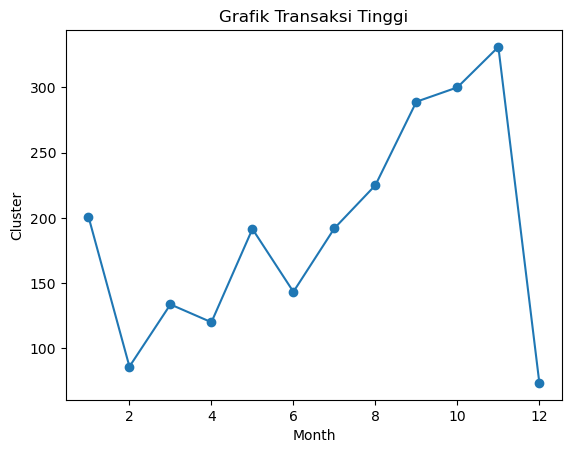

In [161]:
from matplotlib import pyplot as plt

x = transaksi_tinggi['month']
y = transaksi_tinggi['cluster']
plt.scatter(x, y)
plt.plot(x, y)
plt.title('Grafik Transaksi Tinggi')
plt.xlabel('Month')
plt.ylabel('Cluster')

In [162]:
import numpy as np


linreg = LinearRegression()
x = np.array(x).reshape(-1,1)
linreg.fit(x, y)
next_x = 9
next_x = np.array(next_x).reshape(-1,1)
PredictedVal = linreg.predict(next_x)
print('\nPrediksi Januari 2012 \n', PredictedVal.item())


Prediksi Januari 2012 
 216.38286713286715


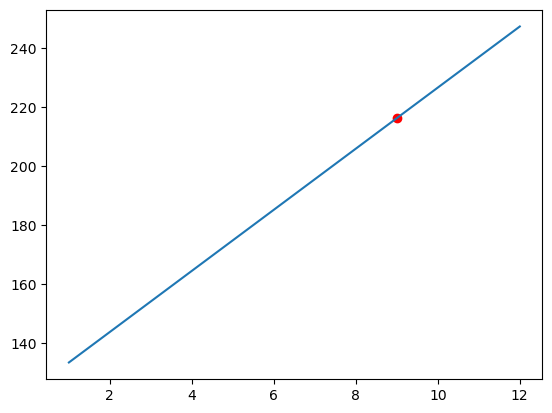

In [163]:
plt.scatter(next_x, PredictedVal, c='red')
pred_y = linreg.predict(x)
plt.plot(x, pred_y)
plt.show()